In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [2]:
from matplotlib import cm

In [3]:
import seaborn as sns

In [4]:
stopwords = set(STOPWORDS)

In [5]:
RESOURCE_DIR = "../resources/"
CSV_FILE = f"{RESOURCE_DIR}/Reproducibility Survey EACL'21 (public document) - 35 papers to produce Figure 1.csv"
EXCEL_FILE = f"{RESOURCE_DIR}/Reproducibility Survey EACL'21 (public document).xlsx"
SAVE_DIR = f"../figures/"

In [6]:
def get_df(csv_path):
    df = pd.read_csv(csv_path)
    return df


In [7]:
# Pandas helpers from 
# https://gist.github.com/shubhamagarwal92/13e2c41d09156c3810740d7697a883d1
def get_column_names(df):
    return df.columns.values

In [8]:
df = get_df(CSV_FILE)
# print(df)
get_column_names(df)

array(['bibtex', 'Authors', 'Title', 'Venue', 'Year', 'Abbr venue',
       'Abstract'], dtype=object)

In [9]:
# https://www.datacamp.com/community/tutorials/wordcloud-python
# SA: last is NaN
year_venue_df = df[["Year", "Abbr venue"]] #[:-1]
year_venue_df.columns = ["Year", "Venue"]
print(type(year_venue_df["Year"]))
year_venue_df = year_venue_df.dropna()

year_venue_df['Year'] = pd.to_datetime(year_venue_df['Year'], format='%Y')  
year_venue_df['Year'] = pd.DatetimeIndex(year_venue_df['Year']).year
# year_venue_df.Year = year_venue_df.Year.astype(int)
year_venue_df

<class 'pandas.core.series.Series'>


,Year,Venue
0,2010,WS
1,2013,ACL
2,2016,WS
3,2017,WS
4,2017,WS
5,2017,TACL
6,2017,EACL
7,2017,EMNLP
8,2017,EMNLP
9,2018,WS


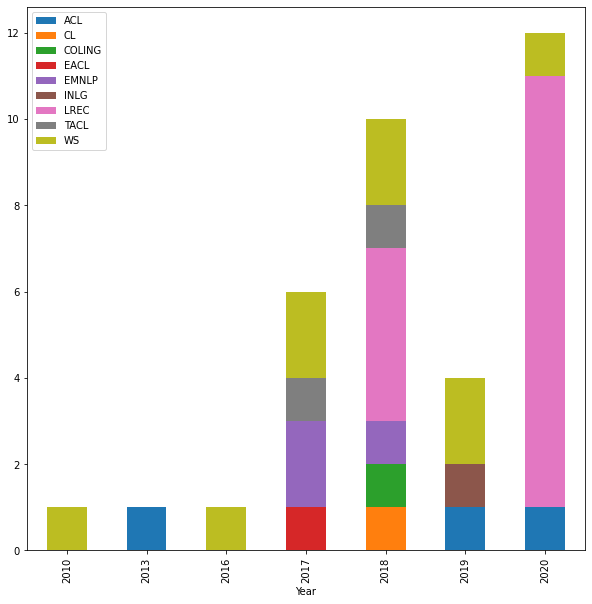

In [10]:
df = year_venue_df.groupby('Year').apply(lambda x: x['Venue'].value_counts())
df = df.unstack().fillna(0)

fig = df.plot(kind='bar', stacked=True,  figsize=(10, 10)).get_figure()
save_filepath = f"{SAVE_DIR}/stacked_bar.png"
fig.savefig(save_filepath)   # save the figure to file

# -------------------------------------------------------------------------
# SA: Uncomment below to create plot with cubehelix palette
# http://rajatrajatg.blogspot.com/2017/01/session7-plotting-graphs-with.html
# Create a cubehelix colormap 
# -------------------------------------------------------------------------
# cmap = sns.cubehelix_palette(start=1, light=0.5, as_cmap=True)
# fig = df.plot(colormap=cmap, kind='bar', stacked=True,  figsize=(10, 5)).get_figure()
# save_filepath = f"{SAVE_DIR}/stacked_bar_5.png"
# fig.savefig(save_filepath)   # save the figure to file